# Ejercicio 1

Se le provee el dataset de iris incluido en la librería `sklearn`. El objetivo es encontrar al menos 3 valores del parámetro `k` y comprar los resultados con el `Ground Truth` (Fuente de datos reales).
Utilizar el bloque de código que nos permite encontrar valores óptimos de `k`

In [7]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np
from sklearn import datasets # Usaremos el dataset de iris.
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
np.random.seed(5)

## Cargamos los datos del dataset `iris`

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

## Buscamos posibles valores de `k`

Utilizando la siguiente herramienta encontrar al menos dos valores representativos de `k` que nos permitan crear agrupaciones.

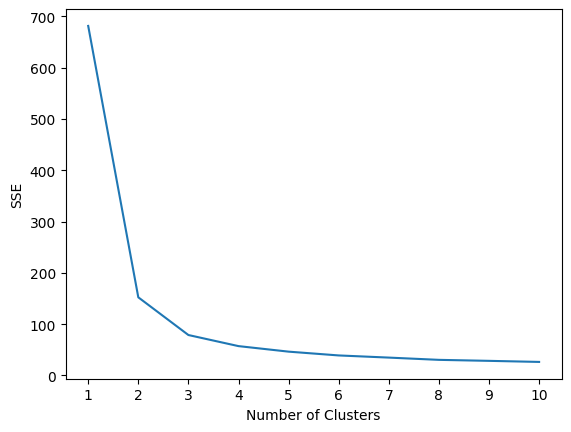

In [9]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
} 

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Estimadores

Creamos una lista con los diferentes parámetros que utilizaremos para evaluar los agrupamientos.
El último estimador lo formazmos con un valor de `n_init=1` (default = 10) para compararlos con aquellos que tienen un valor adecuado para el parámetro.

---

`n_init` Número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide. El resultado final es el mejor resultado de n_init ejecuciones consecutivas en términos de inercia. Se recomiendan varias ejecuciones para problemas dispersos de alta dimensión.

In [10]:
estimators = [
    ("k_means_iris_v1", KMeans(n_clusters=2)),
    ("k_means_iris_v2", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

## Ploteamos los resultados y el `Ground Truth`

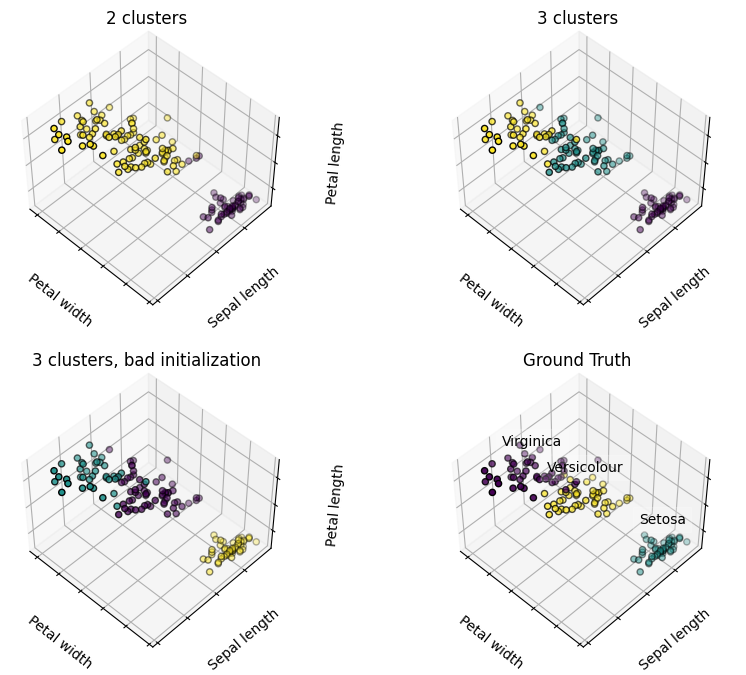

In [11]:
fig = plt.figure(figsize=(10, 8))
titles = ["2 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

# Ejercicio 2

A partir de datos sintéticos comparar los resultados de utilizar el algoritmo `k-means` y `MiniBatchKMeans`

---

`MiniBatchKMeans` es una variante del algoritmo `KMeans` que utiliza minilotes para reducir el tiempo de cálculo, al mismo tiempo que intenta optimizar la misma función objetivo. Los minilotes son subconjuntos de datos de entrada, muestreados aleatoriamente en cada iteración de entrenamiento. Estos minilotes reducen drásticamente la cantidad de cálculo necesario para converger a una solución local. A diferencia de otros algoritmos que reducen el tiempo de convergencia de `k-means`, el `mini-batch k-means` produce resultados que generalmente son sólo ligeramente peores que el algoritmo estándar.


In [12]:
import numpy as np
from sklearn.datasets import make_blobs
import time
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

In [13]:
batch_size = 100
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=100000, centers=centers, cluster_std=1)

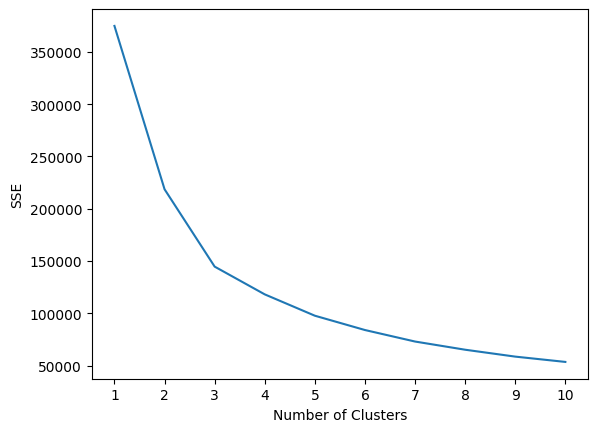

In [14]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Compute time with K-means

In [15]:
k_means = KMeans(n_clusters=3) #TODO
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

## Compute time with Mini Batch K-Means

In [16]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=3) #TODO
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

## Establecer paridad entre clusters

Queremos tener el mismo color para el mismo clúster tanto del algoritmo MiniBatchKMeans como del KMeans. Emparejemos los centros del grupo según el más cercano.

In [17]:
k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

## Ploteamos resultados

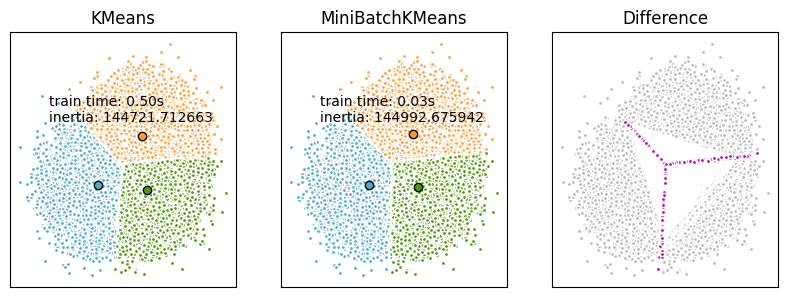

In [18]:
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_mini_batch, mbk.inertia_))

# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identical = np.logical_not(different)
ax.plot(X[identical, 0], X[identical, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(X[different, 0], X[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

# Agrupación jerárquica:

En minería de datos y estadística, la agrupación jerárquica (también llamada análisis de conglomerados jerárquico o HCA) es un método de análisis de conglomerados que busca construir una jerarquía de conglomerados. Las estrategias para la agrupación jerárquica generalmente se dividen en dos tipos

- Aglomerativo: Este es un enfoque "de abajo hacia arriba": cada observación comienza en su propio grupo y los pares de grupos se fusionan a medida que uno asciende en la jerarquía.

- Divisivo: este es un enfoque "de arriba hacia abajo": todas las observaciones comienzan en un grupo y las divisiones se realizan de forma recursiva a medida que uno desciende en la jerarquía.

En general, las fusiones y escisiones se determinan de forma codiciosa. Los resultados del agrupamiento jerárquico suelen presentarse en un dendrograma.

## Ejercicio 2 - Agrupación jerárquica

Se le provee un dataset con datos de compra de diferentes clientes de un supermercado. Utilizar agrupamiento jerárquico para poder establecer clusters de comportamientos similares

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


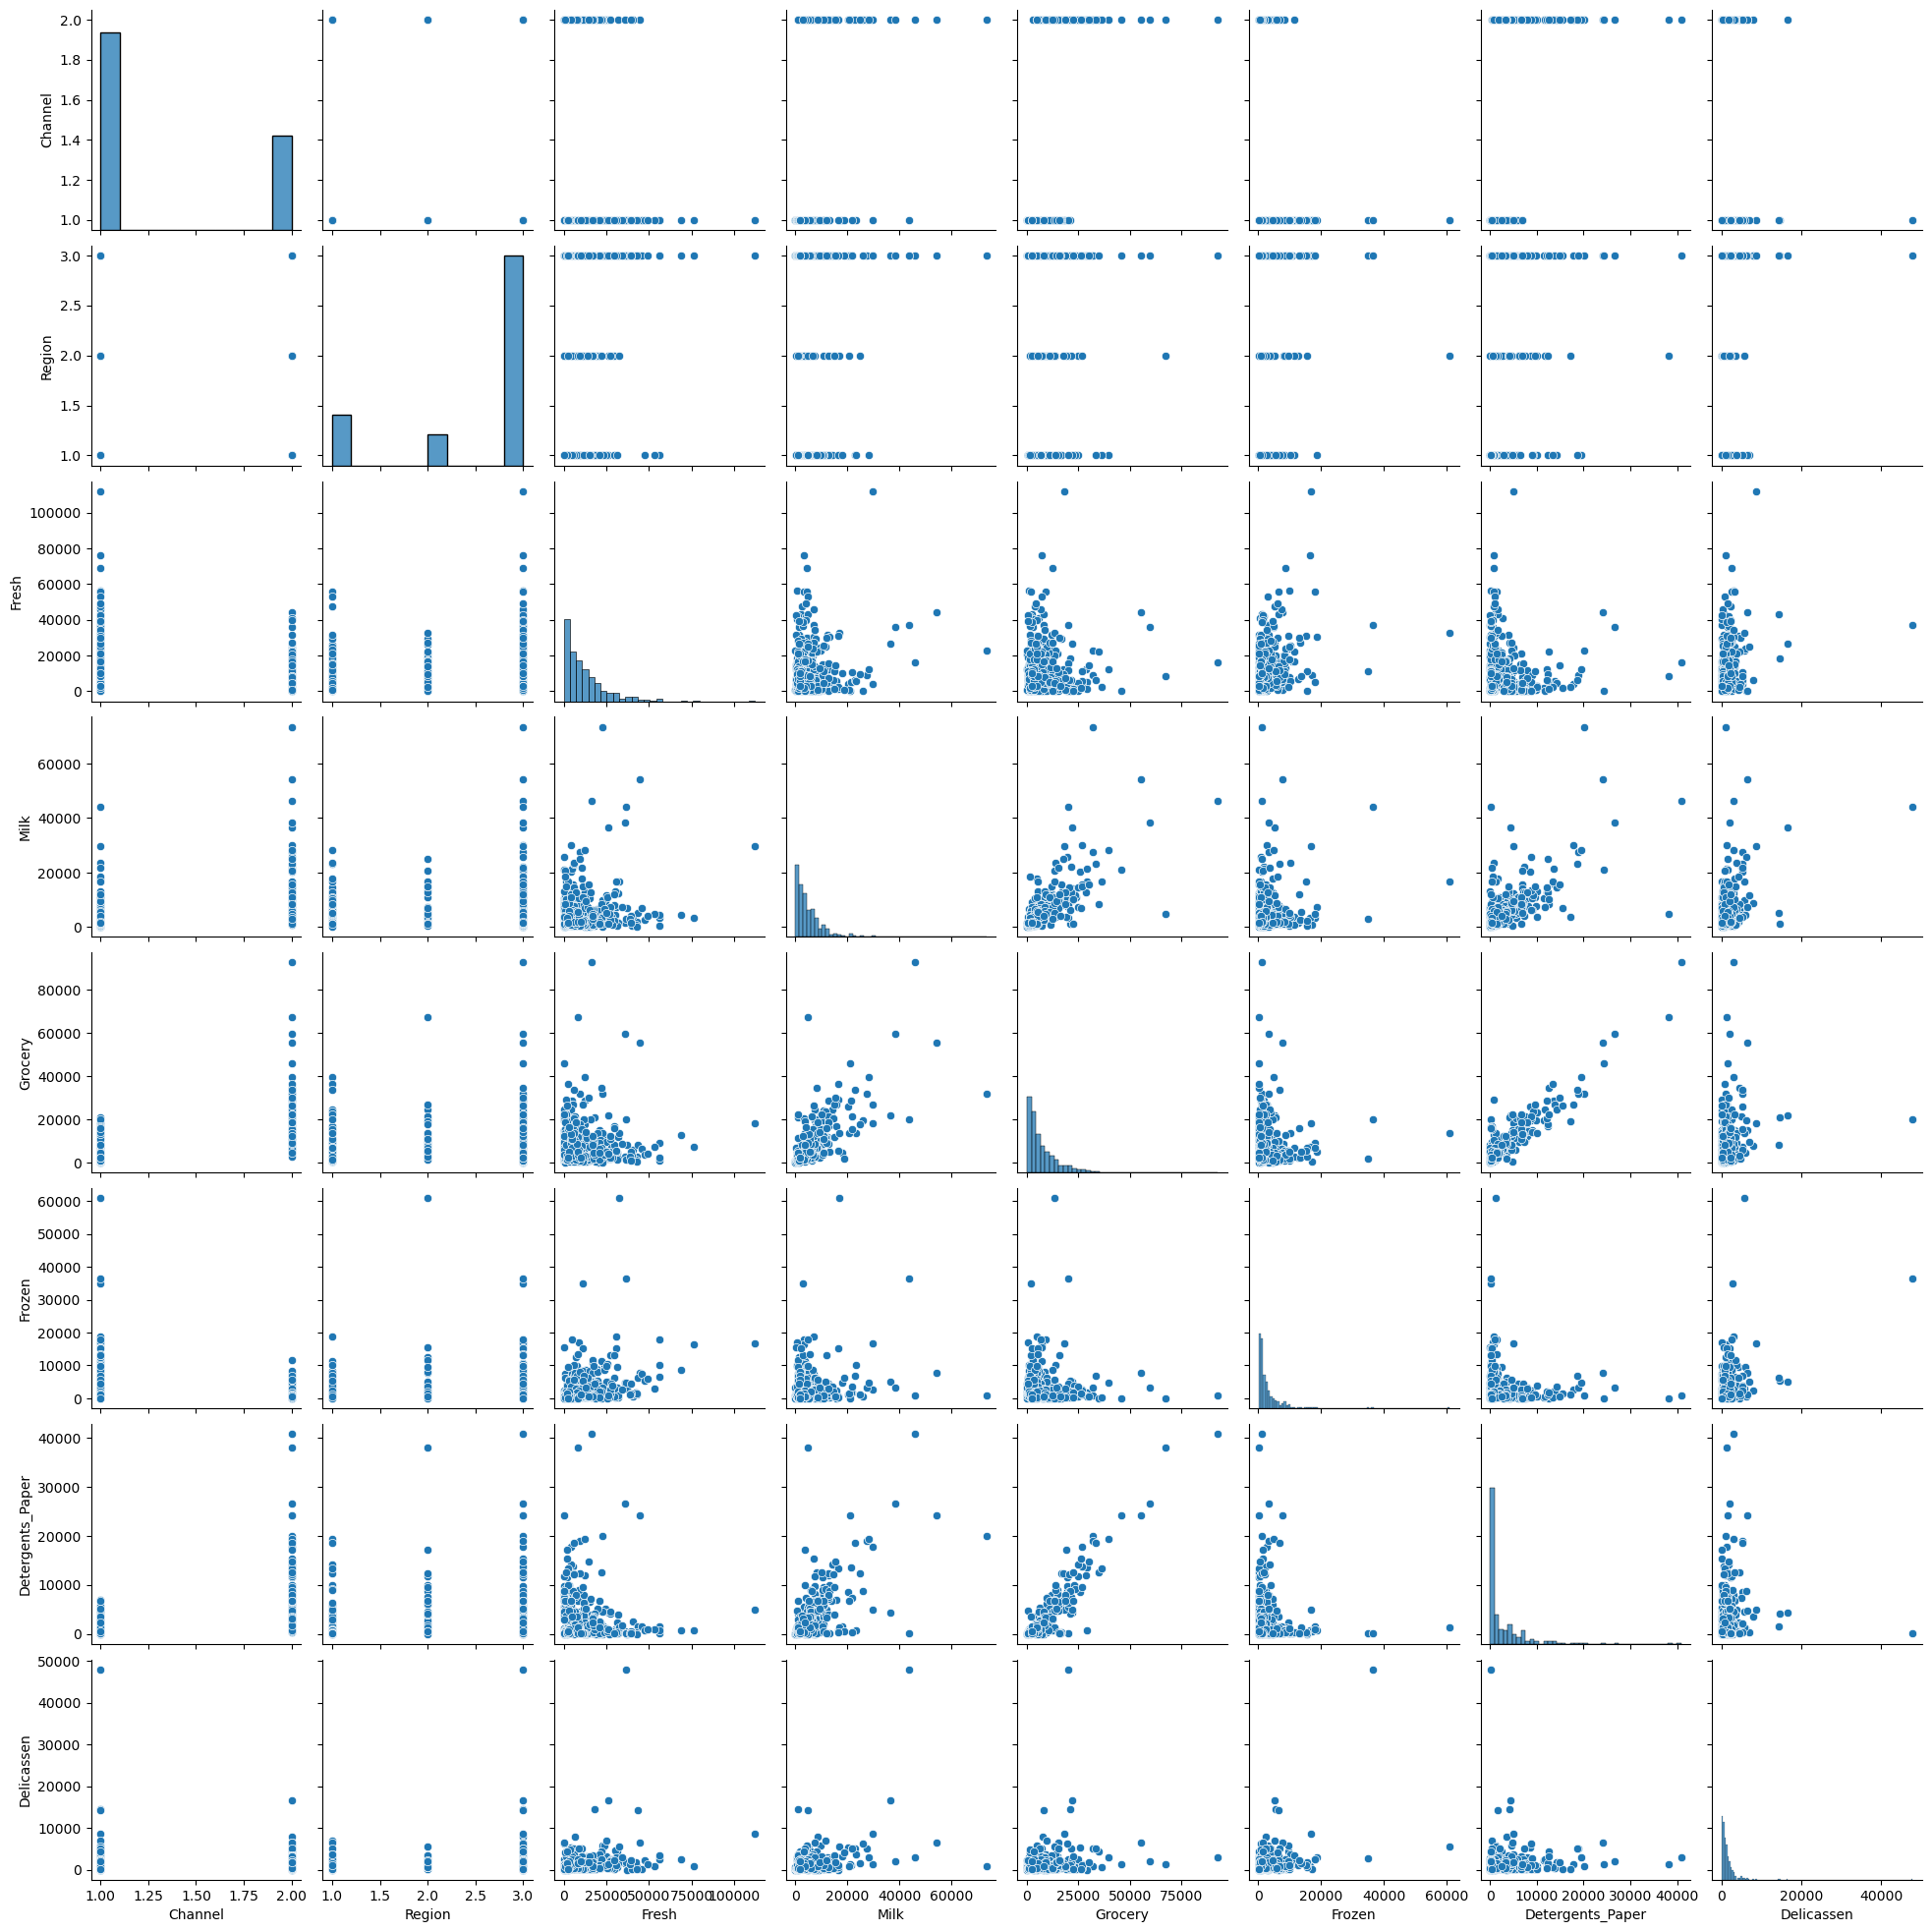

In [ ]:
sns.pairplot(data)

Hay varias categorías de productos: frescos, lácteos, comestibles, etc. Los valores representan la cantidad de unidades compradas por cada cliente para cada producto. Nuestro objetivo es crear grupos a partir de estos datos que puedan segmentar a clientes similares. Por supuesto, utilizaremos agrupación jerárquica para este problema.

Pero antes de aplicar el Clustering Jerárquico, tenemos que normalizar los datos para que la escala de cada variable sea la misma. ¿Porque es esto importante? Bueno, si la escala de las variables no es la misma, el modelo podría sesgarse hacia las variables con una magnitud mayor como `Fresco` o `Leche` (consulte la tabla anterior).

Entonces, primero normalicemos los datos y llevemos todas las variables a la misma escala:

In [38]:
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler() #Normalización - Instanciamos normalizador
data_scaled = normalizer.fit_transform(data) #Al normalizador le aplico el método fit_transform para poder normalizar los datos.
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


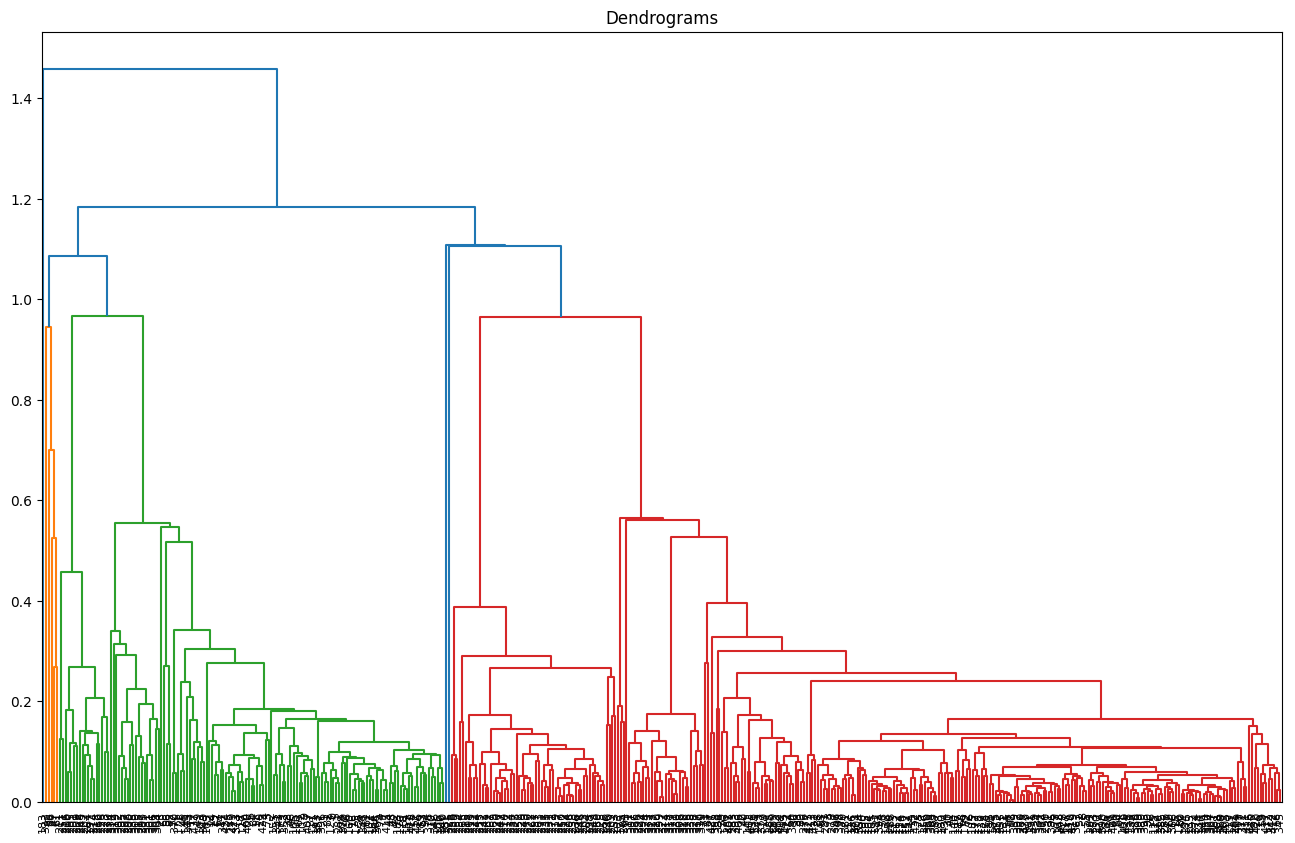

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data_scaled, 
            method='average', 
            metric='euclidean')

plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  

dend = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)



In [28]:
data.shape

(440, 8)

El eje x contiene las muestras y el eje y representa la distancia entre estas muestras. La línea vertical con distancia máxima es la línea azul y por tanto podemos decidir un umbral de 6 y cortar el dendrograma:

In [40]:
def fancy_dendrogram(*args, **kwargs): #permite visualizar las distancias entre clusters
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

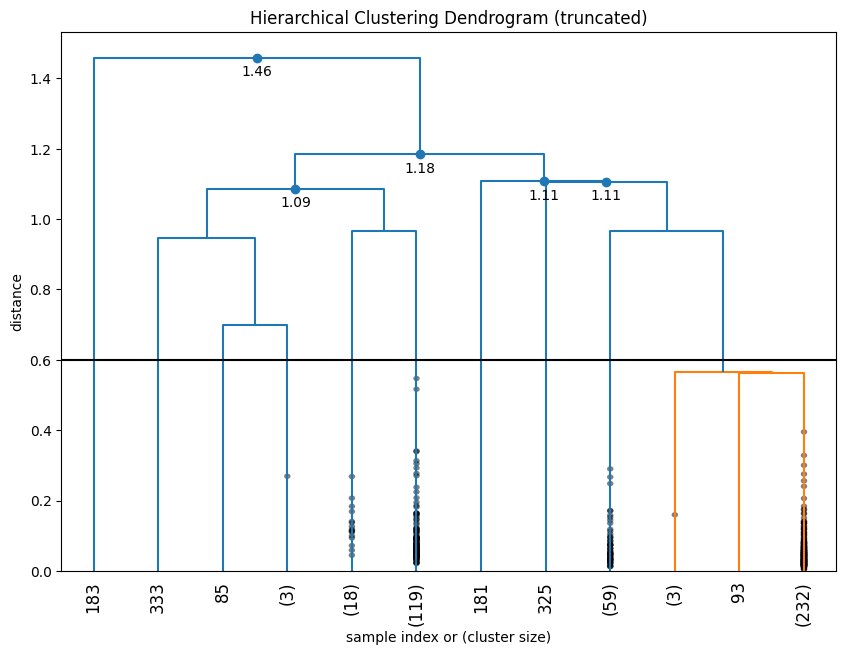

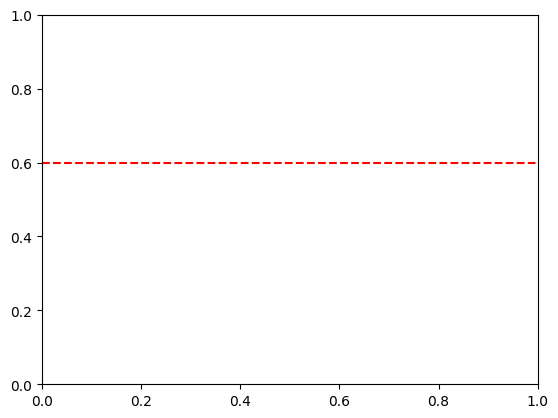

In [42]:
d_max = 0.6
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,  # plot a horizontal cut-off line
)
plt.show()
plt.axhline(y=d_max, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

Ahora agrupamos por los atributos `Milk` y `Grocery` para evaluar el comportamiento de los clientes y si podemos establecer grupos en base este par. 

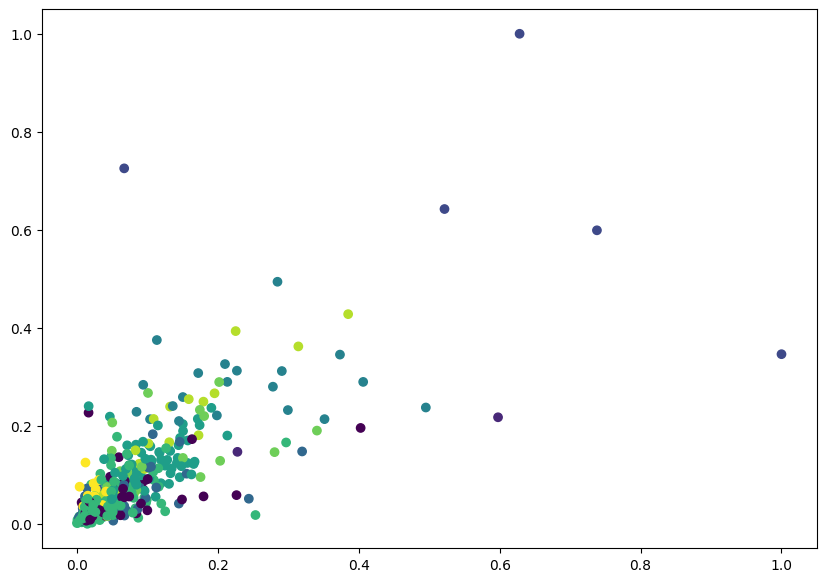

In [44]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

Ahora prueba con otro par para evaluar como se agrupan los clientes.

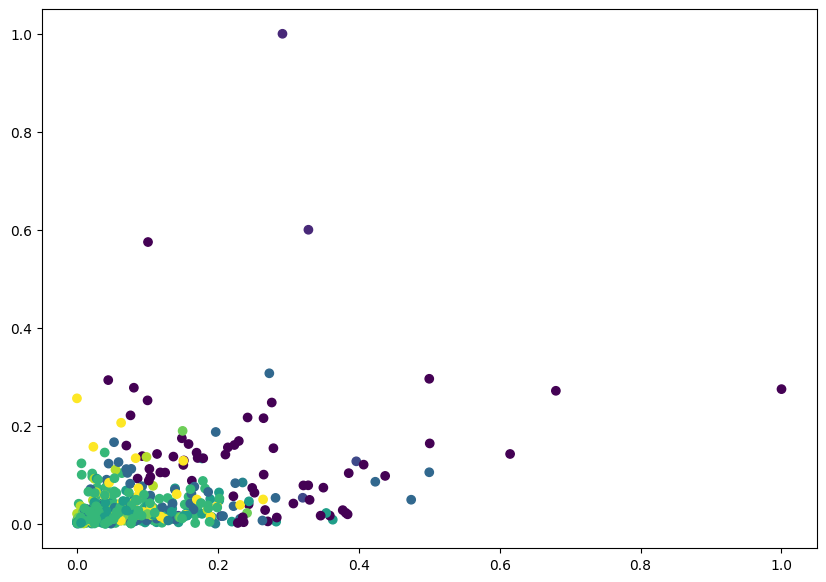

In [45]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Fresh'],data_scaled['Frozen'], c=cluster.labels_) 

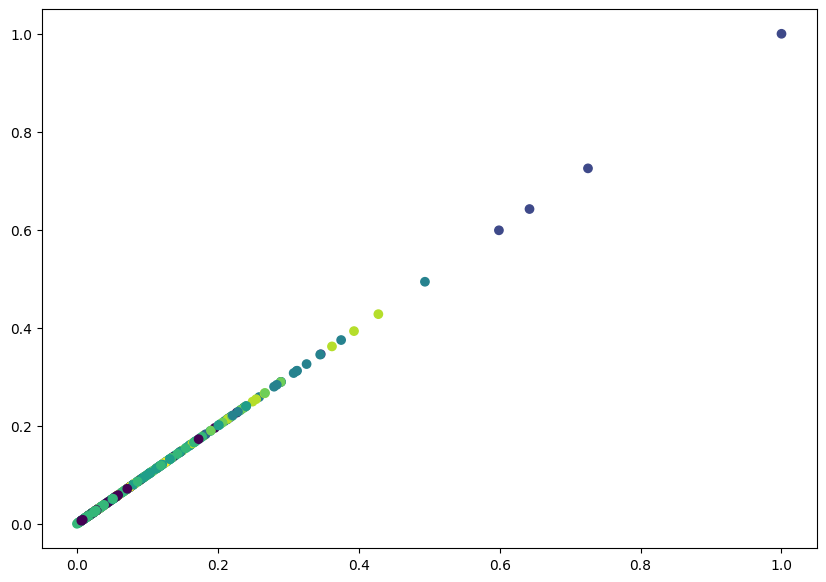

In [48]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Grocery'],data_scaled['Grocery'], c=cluster.labels_) 

In [ ]:
data_scaled['Fresh']

# Ejercicio 3 - Images

Se le brinda una imágen en formato RGB. utilizando el algoritmo correspondiente, reducir su tamaño a un espacio de `8 bits` y compararlo con su original.

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [50]:
flower.shape

(427, 640, 3)

In [51]:
# normalizamos la imagen para que tenga valores entre 0 y 1
data = flower / 255 
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [52]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

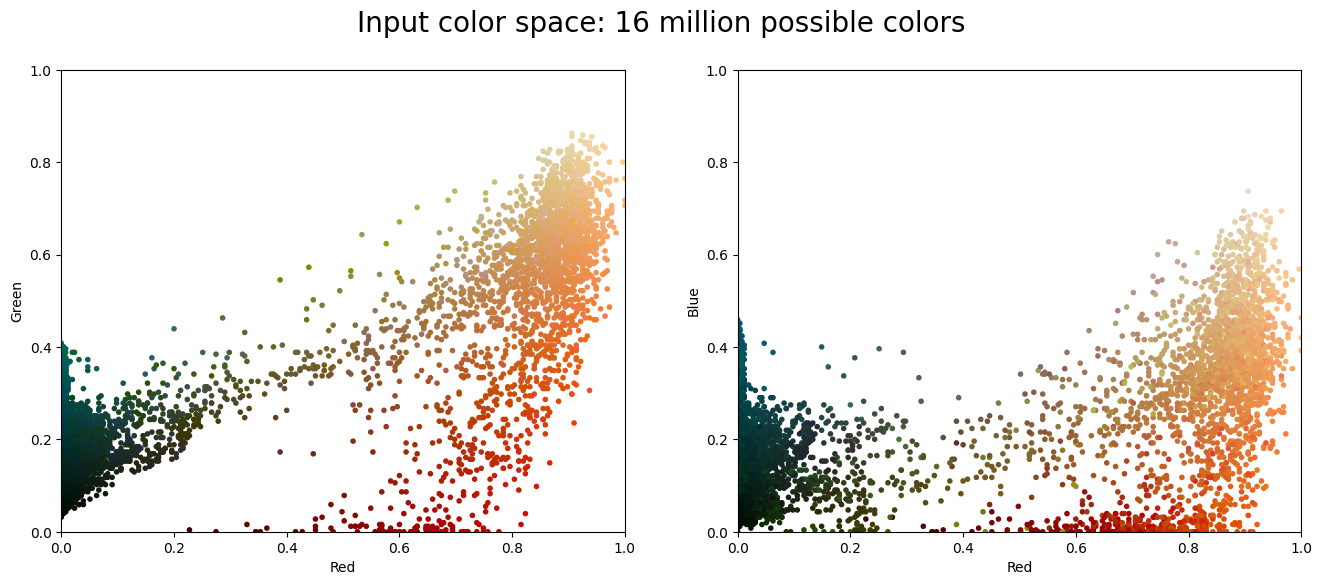

In [53]:
plot_pixels(data, title='Input color space: 16 million possible colors')

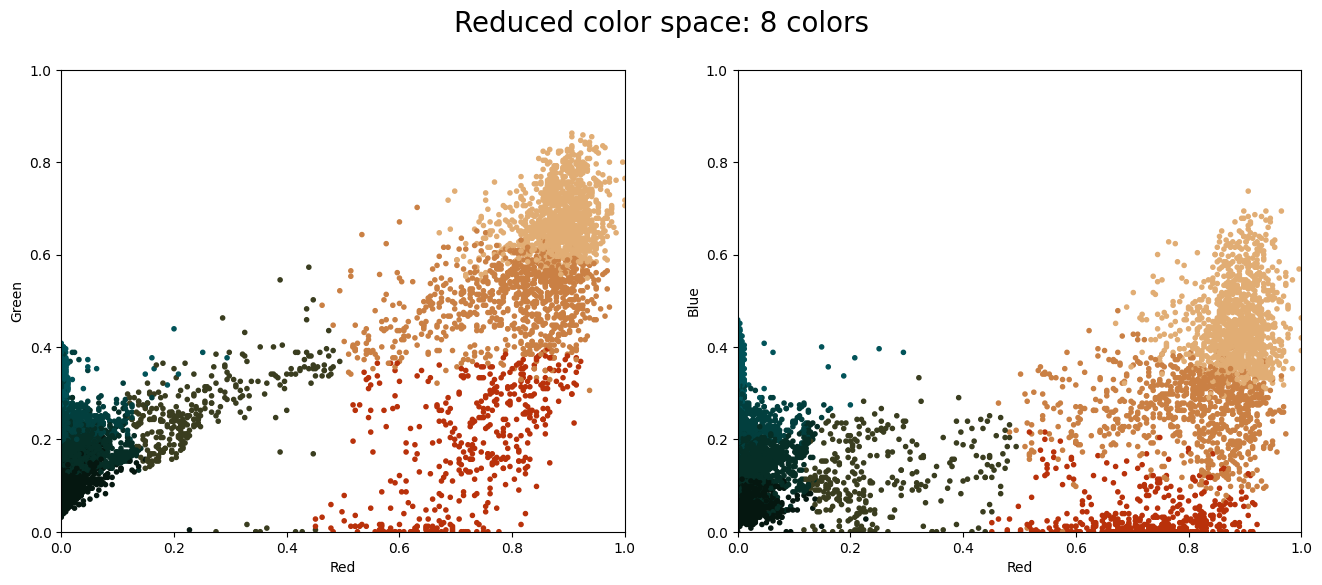

In [83]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(8)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 8 colors")

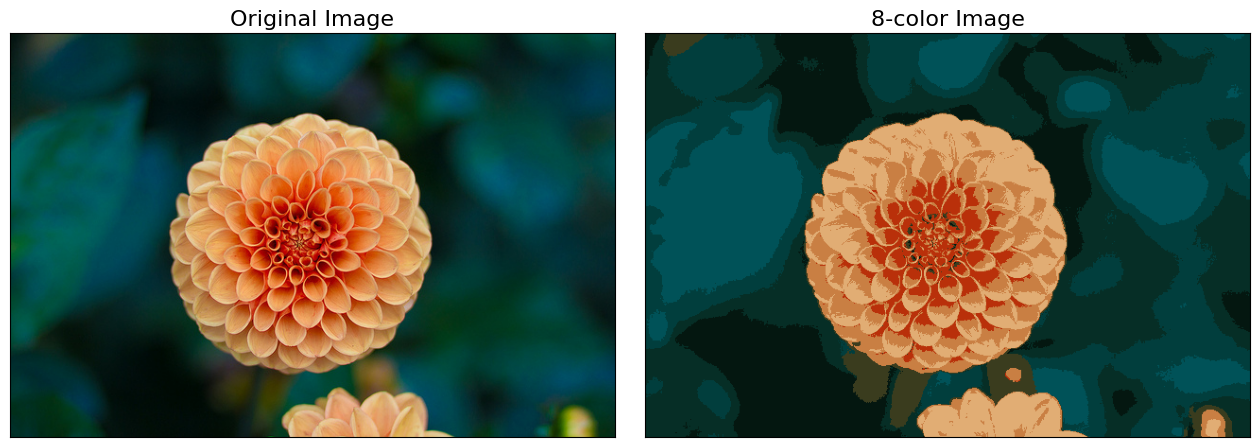

In [87]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('8-color Image', size=16);